In [1]:
import numpy as np 
from numpy import inf
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from math import sqrt
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.utils.data as utils
import time


In [2]:
SP=pd.read_csv('PS1_data.csv',delimiter=',',index_col='date')
SP

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA,CAD,EUR,EUR.1,EUR.2,JPY,GBP,USD,BRL
date,,,,,,,,,,,,,,,,
04.01.00,8202.60,5672.02,6586.95,4657.83,19002.86,6665.90,1399.42,15851.00,0.6884,1.0296,1.0296,1.0296,0.009685,1.6360,1,0.5403
05.01.00,8119.42,5479.70,6502.07,4541.75,18542.55,6535.90,1402.11,16245.14,0.6897,1.0321,1.0321,1.0321,0.009604,1.6426,1,0.5438
06.01.00,8114.24,5450.11,6474.92,4500.69,18168.27,6447.20,1403.45,16106.89,0.6850,1.0328,1.0328,1.0328,0.009503,1.6474,1,0.5430
07.01.00,8429.42,5539.61,6780.96,4648.27,18193.41,6504.80,1441.47,16309.15,0.6869,1.0295,1.0295,1.0295,0.009493,1.6393,1,0.5474
08.01.00,8429.42,5539.61,6780.96,4648.27,18193.41,6504.80,1441.47,16309.15,0.6869,1.0295,1.0295,1.0295,0.009493,1.6393,1,0.5474
09.01.00,8429.42,5539.61,6780.96,4648.27,18193.41,6504.80,1441.47,16309.15,0.6869,1.0295,1.0295,1.0295,0.009493,1.6393,1,0.5474
10.01.00,8602.50,5646.12,6925.52,4714.03,18193.41,6607.70,1457.60,17022.13,0.6869,1.0256,1.0256,1.0256,0.009514,1.6374,1,0.5510
11.01.00,8442.61,5613.90,6891.25,4671.50,18850.92,6518.90,1438.56,16572.72,0.6861,1.0336,1.0336,1.0336,0.009437,1.6475,1,0.5487
12.01.00,8359.96,5582.50,6912.81,4649.30,18677.42,6532.80,1432.25,16616.87,0.6878,1.0309,1.0309,1.0309,0.009451,1.6466,1,0.5471


In [3]:
print(SP.columns)
SP.isna().sum()

Index(['TSX', 'CAC', 'DAX', 'Eurostoxx50', 'NIKKEI225', 'FTSE100', 'SP500',
       'IBOVESPA', 'CAD', 'EUR', 'EUR.1', 'EUR.2', 'JPY', 'GBP', 'USD', 'BRL'],
      dtype='object')


TSX            0
CAC            0
DAX            0
Eurostoxx50    0
NIKKEI225      0
FTSE100        0
SP500          0
IBOVESPA       0
CAD            0
EUR            0
EUR.1          0
EUR.2          0
JPY            0
GBP            0
USD            0
BRL            0
dtype: int64

In [14]:
df_daily_without_fx = SP[['TSX', 'CAC', 'DAX', 'Eurostoxx50', 'NIKKEI225', 'FTSE100', 'SP500',
       'IBOVESPA']]

currencies_fx = SP[['CAD', 'EUR', 'EUR.1', 'EUR.2', 'JPY', 'GBP', 'USD', 'BRL']]

df_daily = pd.DataFrame(df_daily_without_fx.values*currencies_fx.values, columns=df_daily_without_fx.columns, index=df_daily_without_fx.index)

index = pd.to_datetime(df_daily.index,format='%d.%m.%y').strftime('%m/%d/%Y')
df_daily.index = index

print(df_daily.isna().sum())
print(df_daily.min()) # the zero of BRK is dangerous to calculate its return need to change it by the median

print(df_daily)

TSX            0
CAC            0
DAX            0
Eurostoxx50    0
NIKKEI225      0
FTSE100        0
SP500          0
IBOVESPA       0
dtype: int64
TSX            3566.985179
CAC            2630.416790
DAX            2421.493632
Eurostoxx50    2033.124288
NIKKEI225        63.160620
FTSE100        4880.010240
SP500           676.530000
IBOVESPA       2117.832640
dtype: float64
                    TSX          CAC           DAX  Eurostoxx50   NIKKEI225  \
01/04/2000  5646.669840  5839.911792   6781.923720  4795.701768  184.042699   
01/05/2000  5599.963974  5655.598370   6710.786447  4687.540175  178.082650   
01/06/2000  5558.254400  5628.873608   6687.297376  4648.312632  172.653070   
01/07/2000  5790.168598  5703.028495   6980.998320  4785.393965  172.710041   
01/08/2000  5790.168598  5703.028495   6980.998320  4785.393965  172.710041   
01/09/2000  5790.168598  5703.028495   6980.998320  4785.393965  172.710041   
01/10/2000  5909.057250  5790.660672   7102.813312  4834.709168  17

In [17]:
def dropdup(df,columns):
    for i in columns:
        df[i].drop_duplicates(inplace=True)
    return df

#df_daily.drop_duplicates(inplace=True)
df_daily = dropdup(df_daily,df_daily.columns)
df_daily

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
01/04/2000,5646.669840,5839.911792,6781.923720,4795.701768,184.042699,10905.412400,1399.42,8564.295300
01/05/2000,5599.963974,5655.598370,6710.786447,4687.540175,178.082650,10735.869340,1402.11,8834.107132
01/06/2000,5558.254400,5628.873608,6687.297376,4648.312632,172.653070,10621.117280,1403.45,8746.041270
01/07/2000,5790.168598,5703.028495,6980.998320,4785.393965,172.710041,10663.318640,1441.47,8927.628710
01/10/2000,5909.057250,5790.660672,7102.813312,4834.709168,173.092103,10819.447980,1457.60,9379.193630
01/11/2000,5792.474721,5802.527040,7122.796000,4828.462400,177.896132,10739.887750,1438.56,9093.451464
01/12/2000,5749.980488,5754.999250,7126.415829,4792.963370,176.520296,10756.908480,1432.25,9091.089577
01/13/2000,5802.486042,5778.577592,7135.444284,4809.309430,177.466092,10758.686800,1449.68,9539.885605
01/14/2000,5764.140162,5858.046768,7260.733284,4888.278192,179.063571,10861.521660,1465.15,9787.801685
01/17/2000,5849.848373,5914.061916,7347.458580,4944.090900,185.314551,10893.294350,1465.15,10061.059506


In [96]:
ret_daily= np.log(df_daily ).diff()
ret_daily = ret_daily.dropna()
ret_daily

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
01/05/2000,-0.008306,-0.032070,-0.010545,-0.022812,-0.032920,-0.015669,0.001920,0.031018
01/06/2000,-0.007476,-0.004737,-0.003506,-0.008404,-0.030964,-0.010746,0.000955,-0.010019
01/07/2000,0.040877,0.013088,0.042982,0.029064,0.000330,0.003965,0.026730,0.020550
01/10/2000,0.020325,0.015249,0.017299,0.010253,0.002210,0.014536,0.011128,0.049343
01/11/2000,-0.019927,0.002047,0.002809,-0.001293,0.027376,-0.007381,-0.013149,-0.030939
01/12/2000,-0.007363,-0.008225,0.000508,-0.007379,-0.007764,0.001584,-0.004396,-0.000260
01/13/2000,0.009090,0.004089,0.001266,0.003405,0.005344,0.000165,0.012096,0.048187
01/14/2000,-0.006630,0.013659,0.017406,0.016287,0.008961,0.009513,0.010615,0.025655
01/17/2000,0.014760,0.009517,0.011874,0.011353,0.034314,0.002921,0.000000,0.027536
01/18/2000,0.012209,-0.028017,-0.024587,-0.024128,-0.020039,-0.022223,-0.006856,-0.007267


In [135]:
fama_daily = pd.read_csv('fama_french.csv',delimiter=',')
rf_daily = fama_daily['RF']

dates = fama_daily['date']
dates = pd.to_datetime(dates,format='%Y%m%d').dt.strftime('%m/%d/%Y')

rf_daily.index = dates

target_dates = df_daily.index

Rf_fama = rf_daily.loc[target_dates]

print(Rf_fama.shape, ret_daily.shape)
print(Rf_fama.isna().sum())
mask = Rf_fama.isna()
for i in mask.index:
    if mask.loc[i] == True:
        x = np.roll(Rf_fama.loc[i:],1)
        x = x[np.isfinite(x)]
        Rf_fama.loc[i] = x[2]

Rf_fama.isna().sum()
print(Rf_fama.shape,ret_daily.shape)

/Users/4romain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()


(4180,) (4179, 8)
150
(4180,) (4179, 8)


## General Parameters

In [342]:
number = 3
rolling_window_step = 195
lr = 0.0000025
epochs = 200
VALIDATION_SPLIT=0.9

In [343]:
def dailytosomething(df,rf,number):
    new_df = df.iloc[::number,:]
    new_rf = rf.iloc[::number]
    new_rf = new_rf.iloc[:].shift(1)#/12
    ret= new_df.pct_change(1)
    ret = ret.drop(ret.index[[0]])
    rf_final = new_rf.drop(new_rf.index[[0]])
    return ret,rf_final

ret_weekly, Rf_weekly = dailytosomething(df_daily,Rf_fama,number)
print(ret_weekly.shape)
print(Rf_weekly.shape)

Rf_weekly = ((1 + Rf_weekly)**number) -1


print(ret_weekly)
Rf_weekly
#print(ret_daily.iloc[:number])
#print(ret_weekly.shape)

(1393, 8)
(1393,)
                 TSX       CAC       DAX  Eurostoxx50  NIKKEI225   FTSE100  \
01/07/2000  0.025413 -0.023439  0.029354    -0.002149  -0.061576 -0.022199   
01/12/2000 -0.006941  0.009113  0.020830     0.001582   0.022062  0.008777   
01/17/2000  0.017368  0.027639  0.031017     0.031531   0.049820  0.012679   
01/20/2000  0.026097 -0.018329 -0.015693    -0.017212  -0.027211 -0.036210   
01/25/2000 -0.013493 -0.034988 -0.057574    -0.041407  -0.011368 -0.016830   
01/28/2000 -0.020331 -0.002942  0.010571     0.000678   0.017961  0.000674   
02/02/2000  0.052288  0.039573  0.016782     0.027025  -0.002404 -0.018314   
02/07/2000  0.035368  0.048510  0.022550     0.033612   0.014643 -0.035742   
02/10/2000  0.018321  0.004611  0.060795     0.030515  -0.016847  0.033860   
02/15/2000 -0.001617 -0.022393 -0.044416    -0.029179  -0.017683 -0.051866   
02/18/2000 -0.002855 -0.002476  0.026523     0.009653   0.005457  0.030019   
02/23/2000 -0.004450  0.014728  0.036883     0

01/07/2000    0.064332
01/12/2000    0.064332
01/17/2000    0.064332
01/20/2000    0.064332
01/25/2000    0.064332
01/28/2000    0.064332
02/02/2000    0.064332
02/07/2000    0.067463
02/10/2000    0.067463
02/15/2000    0.067463
02/18/2000    0.067463
02/23/2000    0.067463
02/28/2000    0.067463
03/02/2000    0.067463
03/07/2000    0.061208
03/10/2000    0.061208
03/15/2000    0.061208
03/20/2000    0.061208
03/23/2000    0.061208
03/28/2000    0.061208
03/31/2000    0.061208
04/05/2000    0.061208
04/10/2000    0.073742
04/13/2000    0.073742
04/18/2000    0.073742
04/21/2000    0.073742
04/26/2000    0.073742
05/01/2000    0.073742
05/04/2000    0.070599
05/09/2000    0.070599
                ...   
09/10/2015    0.000000
09/15/2015    0.000000
09/18/2015    0.000000
09/23/2015    0.000000
09/28/2015    0.000000
10/01/2015    0.000000
10/06/2015    0.000000
10/09/2015    0.000000
10/14/2015    0.000000
10/19/2015    0.000000
10/22/2015    0.000000
10/27/2015    0.000000
10/30/2015 

In [344]:
#compute portfolio weights

roll_weekly_mean = ret_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).mean() #rolling window = 12 month * 10 years of data to define returns of each portfolios
roll_weekly_std = ret_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).std()
roll_weekly_cov = ret_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).cov()
roll_weekly_Rf = Rf_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).mean()


1199
0.06433226099999967

 (a) Time series of the portfolio weights:


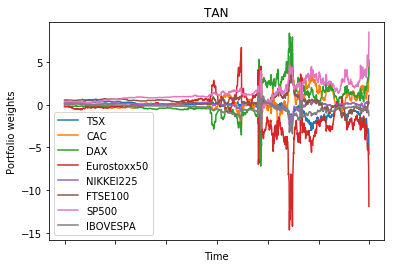

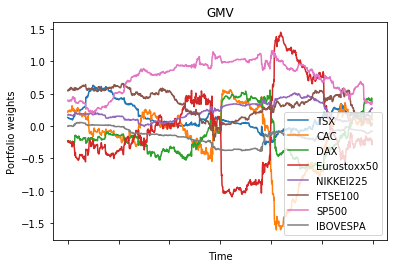

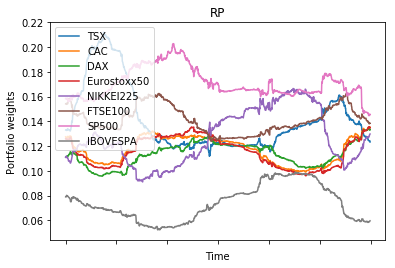

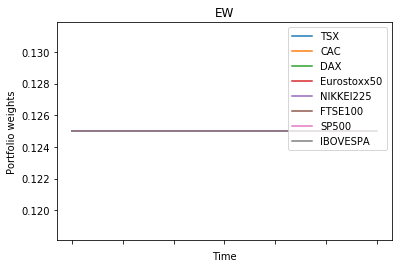

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [345]:
number_of_indexes = ret_weekly.shape[1]
ONES = np.ones(number_of_indexes)

dates = ret_weekly.iloc[(rolling_window_step-1):].index.get_level_values(0)
print(len(dates))
print(Rf_weekly[0])
#Rf_weekly.index = ret_weekly.index[1:]
#Rf_weekly.index = ret_weekly.index[1:]

w = np.zeros((len(dates), 4, number_of_indexes))
i = 0
for date in dates: 
    # esimation of parameters
    MU = roll_weekly_mean.loc[date].values
    STD = roll_weekly_std.loc[date].values
    SIGMA = roll_weekly_cov.loc[date].values
    INV_SIGMA = np.linalg.inv(SIGMA)
    #R0 = roll_Rf.loc[date]
    #i.e., estimation of risk premium (mu-R0)
    #An alternative is to esimate the expected return mu,
    #and to use the current risk-free rate to compute the weights.
    #In this second case, set: 
    R0 = Rf_weekly.loc[date]
    
    A = (ONES@INV_SIGMA)@ONES
    B = (ONES@INV_SIGMA)@MU
    C = (MU@INV_SIGMA)@MU
    DELTA = A*C-B**2
    
    # composition of portfolio
    w[i,0,:] = (INV_SIGMA@(MU-R0))/(B-A*R0) #TAN
    w[i,1,:] = (INV_SIGMA@ONES)/A # GMV
    tmp = 1/STD
    w[i,2,:] = tmp/tmp.sum() #RP
    w[i,3,:] = np.ones(number_of_indexes)/number_of_indexes #EW
    i+=1
    

#plotting portfolios
columns = ret_weekly.columns
asset_classes = columns
strategies = ['TAN','GMV','RP','EW']

print('\n (a) Time series of the portfolio weights:')
for i in range(len(strategies)): 
    df_w = pd.DataFrame(data=w[:,i,:],index=dates,columns=asset_classes)
    df_w.plot(title=strategies[i])
    plt.xlabel('Time')
    plt.ylabel('Portfolio weights')
    plt.legend(asset_classes, loc=0)
    plt.show()
print(sum(np.isnan(w)))

In [346]:
#computing portfolio returns
dates_perf = ret_weekly.iloc[rolling_window_step:].index.get_level_values(0)

p_perf = np.zeros((len(dates_perf), 4))
for j in range(len(strategies)): 
    tmp = np.multiply(w[:-1,j,:],ret_weekly.iloc[rolling_window_step:]) # :-1 means except the last
    p_perf[:,j] = tmp.sum(axis=1) # sum over each lines of the matrix and p_perf = returns on each portfolios [return port for each time, strategies]
    
df_p_perf = pd.DataFrame(data=p_perf,index=dates_perf,columns=strategies)

R0 = Rf_weekly.loc[dates_perf].mean()
M = df_p_perf.mean()
E = df_p_perf.mean()-R0
S = df_p_perf.std()
SR = E/S
index = ['Mean Return', 'Mean Excess Return', 'Std. Dev.', 'Sharpe Ratio']
pStats = pd.DataFrame({index[0] : M, 
                    index[1] : E,
                    index[2] : S, 
                    index[3] : SR
                      })
pStats = pStats.T
pStats = pStats.reindex(index)

index_a = [' (ann.)']*4
index_a = [x+y for x, y in zip(index, index_a)]
pStats_a = pd.DataFrame({index_a[0] : M*12, # change *12 cause were not anymore annual
                    index_a[1] : E*12,  # change *12 cause were not anymore annual
                    index_a[2] : S*np.sqrt(12),  # change *12 cause were not anymore annual
                    index_a[3] : SR*np.sqrt(12)  # change *12 cause were not anymore annual
                      })
pStats_a = pStats_a.T
pStats_a = pStats_a.reindex(index_a)

print('\n (b) Mean, standard deviation and Sharpe ratio of portfolio returns:')
print('\n The monthly return statistics of the strategies are:')
display(np.around(pStats,6))
print('\n The annualized return statistics of the strategies are:')
display(np.around(pStats_a,6))




 (b) Mean, standard deviation and Sharpe ratio of portfolio returns:

 The monthly return statistics of the strategies are:


,TAN,GMV,RP,EW
Mean Return,0.000879,0.000363,0.000648,0.000727
Mean Excess Return,-0.014478,-0.014994,-0.014710,-0.014630
Std. Dev.,0.032647,0.015756,0.021437,0.022529
Sharpe Ratio,-0.443475,-0.951693,-0.686201,-0.649406



 The annualized return statistics of the strategies are:


,TAN,GMV,RP,EW
Mean Return (ann.),0.010553,0.004358,0.007775,0.008728
Mean Excess Return (ann.),-0.173739,-0.179933,-0.176517,-0.175564
Std. Dev. (ann.),0.113093,0.054579,0.074258,0.078042
Sharpe Ratio (ann.),-1.536242,-3.296763,-2.377070,-2.249609



 (d) Minimum-variance frontier and location of the 4 portfolios using ex-post performance:


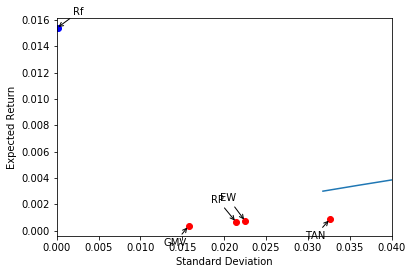

In [347]:
#MV frontiers
Mup = np.linspace(0.003,0.009,1000)
MU = ret_weekly.loc[dates_perf].mean().values
SIGMA = ret_weekly.loc[dates_perf].cov().values
INV_SIGMA = np.linalg.inv(SIGMA)


A = (ONES@INV_SIGMA)@ONES
B = (ONES@INV_SIGMA)@MU
C = (MU@INV_SIGMA)@MU
DELTA = A*C-B**2

Sigmap = np.sqrt((A*np.multiply(Mup,Mup)-2*B*Mup+C)/DELTA)

plt.plot(Sigmap,Mup)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.plot(S,M,'ro')
plt.plot(0.0001,R0,'bo')
plt.xlim(0, 0.04)


plt.annotate('TAN', xy=(S[0],M[0]), xytext=(S[0]-.003, M[0]-.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('GMV', xy=(S[1],M[1]), xytext=(S[1]-.003, M[1]-.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('RP', xy=(S[2],M[2]), xytext=(S[2]-.003, M[2]+.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('EW', xy=(S[3],M[3]), xytext=(S[3]-.003, M[3]+.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Rf', xy=(0, R0), xytext=(.001+.001, R0+.001),
            arrowprops=dict(arrowstyle="->")          
            )

print('\n (d) Minimum-variance frontier and location of the 4 portfolios using ex-post performance:')
plt.show()





 (e) Cumulative performance of 1$ invested in December 1987:


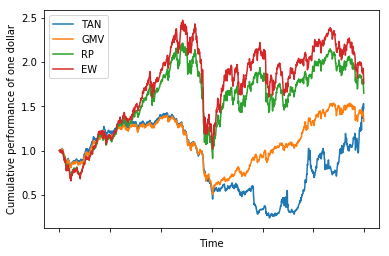

In [348]:
#total return index
dates_cumperf = ret_weekly.iloc[(rolling_window_step-1):].index.get_level_values(0)
ones = np.ones((1,4))

cumperf = np.cumprod(np.concatenate((ones,1 + p_perf),axis=0),axis=0) #cumprod because when we win money we reinvest it directly
df_cumperf = pd.DataFrame(data=cumperf,index=dates_cumperf,columns=strategies)

#df_cumperf.drop(columns=['TAN'],inplace=True)
df_cumperf.plot()
plt.xlabel('Time')
plt.ylabel('Cumulative performance of one dollar')
strategies = ['TAN','GMV','RP','EW']
#strategies = ['GMV','RP','EW']
plt.legend(strategies, loc=0)
#plt.ylim([-20,50])


print('\n (e) Cumulative performance of 1$ invested in December 1987:')
plt.show()


In [349]:
labels = np.zeros(len(p_perf))
for i in range(len(p_perf)): # the goal is to define the classification of the labels for the crossentropy loss
    opt = np.argmax(p_perf[i,:])
    labels[i] = opt
print(labels.shape)
print(labels)

labels_training = labels[:1012]
labels_test = labels[1012:]

print(labels_training.shape[0] + labels_test.shape[0])

(1198,)
[0. 1. 2. ... 0. 0. 1.]
1198


In [350]:
print(sum(labels_training == 0))
print(sum(labels_training == 1))
print(sum(labels_training == 2))
print(sum(labels_training == 3))

print(sum(labels_test == 0))
print(sum(labels_test == 1))
print(sum(labels_test == 2))
print(sum(labels_test == 3))

# starting date of labels : 11/14/2003 because we need five days of inputs in order to predict
# the best portfolio in 6 days
print(roll_weekly_mean.iloc[rolling_window_step])

#starting date of our inputs : 10/31/2003
print(roll_weekly_mean.iloc[rolling_window_step-2])

#last date of labels : 01/07/2016
print(ret_weekly.iloc[-1])

indexes = roll_weekly_mean.iloc[rolling_window_step-2:].index
index = indexes[0]
index

313
205
70
424
93
39
8
46
TSX           -0.000544
CAC           -0.001522
DAX           -0.001669
Eurostoxx50   -0.001666
NIKKEI225     -0.003120
FTSE100       -0.001576
SP500         -0.001063
IBOVESPA      -0.001305
Name: 04/05/2002, dtype: float64
TSX           NaN
CAC           NaN
DAX           NaN
Eurostoxx50   NaN
NIKKEI225     NaN
FTSE100       NaN
SP500         NaN
IBOVESPA      NaN
Name: 03/28/2002, dtype: float64
TSX           -0.044498
CAC           -0.027347
DAX           -0.027998
Eurostoxx50   -0.025514
NIKKEI225     -0.016862
FTSE100       -0.038406
SP500         -0.037930
IBOVESPA      -0.046738
Name: 01/11/2016, dtype: float64


'03/28/2002'

In [351]:


def co_columns_name(columns, string):
    res =[]
    for c in columns:
        for c1 in columns:
            if c!=c1:
                res.append(string+c+"_"+c1)
    return res

def get_co_matrix(co_rolling, columns, co_columns, dates):  
    data = pd.DataFrame(columns = co_columns)
    count = 0
    for tick in columns:
        i = 0
        for tick2 in columns:
            if tick!=tick2:
                data[co_columns[count]] = co_rolling[tick][i::N_ASSETS].values
                count+=1
            i+=1
    return data.set_index(dates)
def include_co_in_input(inputs, co_data):
    for c in co_data.columns:
        inputs[c] = co_data[c]
    return inputs
corr_columns =co_columns_name(columns, "corr_")
#print(corr_columns)
#print(corr_columns[5], corr_rolling["XOMA"][3::7])
cov_columns = co_columns_name(columns, "cov_")

N_LABELS = number_of_indexes * 3 + 1 + len(cov_columns)
N_ASSETS = number_of_indexes


In [352]:
ret_daily_input = ret_daily.loc[index:]
print(ret_daily_input)
start_index= np.where(ret_daily.index==index)[0]-rolling_window_step#596
start_index = start_index[0]
print(start_index)
print(len(ret_daily)-len(ret_daily_input))
print(ret_daily_input.iloc[0])
print(index)

                 TSX       CAC       DAX  Eurostoxx50  NIKKEI225   FTSE100  \
03/28/2002  0.003579  0.012432  0.007683     0.011561  -0.001025  0.011101   
03/29/2002 -0.001594  0.000574  0.000574     0.000574  -0.027170  0.000561   
04/01/2002  0.003752  0.010158  0.010158     0.010158  -0.005383  0.010673   
04/02/2002  0.002530 -0.014394 -0.017465    -0.012015   0.017548 -0.007631   
04/03/2002 -0.004422  0.002883 -0.003703     0.003014   0.021218 -0.000477   
04/04/2002 -0.009945 -0.023332 -0.007946    -0.018257   0.001160 -0.008719   
04/05/2002  0.003509 -0.005222  0.000834    -0.003859   0.001694  0.003220   
04/08/2002 -0.009067 -0.022501 -0.019127    -0.023810   0.001929 -0.011473   
04/09/2002 -0.003449  0.014148  0.005000     0.012003  -0.016629  0.004447   
04/10/2002  0.011957  0.011870  0.017207     0.009275   0.010892  0.009163   
04/11/2002 -0.011831 -0.015419 -0.017143    -0.015996  -0.012410 -0.016231   
04/12/2002  0.007067  0.002599  0.001751     0.001691  -0.019833

In [353]:
rolling_window_step_daily = rolling_window_step 

ret_daily_rolling =  ret_daily.rolling(window=rolling_window_step_daily,min_periods=rolling_window_step_daily)

roll_daily_mean = ret_daily_rolling.mean()
roll_daily_std = ret_daily_rolling.std()
roll_Rf_daily_mean = Rf_fama.rolling(window=rolling_window_step_daily,min_periods=rolling_window_step_daily).mean()


def column_names(tickers,original =False, mean= False, std=False):
    res = []
    for t in tickers: 
        if original:
            res.append(t)
        if mean:
            res.append(t+"_mean")
        if std:
            res.append(t+"_std")
    return res

dates = ret_daily.loc[index:].index.get_level_values(0)
print(dates)
input_price = pd.DataFrame(ret_daily.loc[index:].values,columns=columns).set_index(dates)
input_mean = pd.DataFrame(roll_daily_mean.loc[index:].values,columns=column_names(columns, mean= True)).set_index(dates)
input_std = pd.DataFrame(roll_daily_std.loc[index:].values,columns=column_names(columns, std=True)).set_index(dates)

concat = pd.concat([input_price, input_mean, input_std], axis=1)
inputs = concat[column_names(columns, True, True, True)][:-number] #can not predict the last horizon
inputs['Rf'] = roll_Rf_daily_mean.loc[index:]
correlation_rolling = ret_daily_rolling.corr().dropna()[start_index*N_ASSETS:]
print(dates)
#co[start_index*7:-number*7]
#correlation_data = get_co_matrix(correlation_rolling,columns, corr_columns,dates[:-number])
cov_rolling = ret_daily_rolling.cov().dropna()[(start_index+1)*N_ASSETS:]
print(cov_rolling)
cov_data = get_co_matrix(cov_rolling, columns, cov_columns,dates)
inputs = include_co_in_input(inputs, cov_data)
#inputs = include_co_in_input(inputs, correlation_data)
print(inputs)

def reshape_inputs(inputs, number):
    if inputs.shape[0] % number == 0:
        lstm_inputs = inputs.values.reshape((int(len(inputs)/number),number,N_LABELS))
        print("dataframe original shape", inputs.shape, "reshaped to ", lstm_inputs.shape)
    else:
        flo = np.floor(inputs.shape[0]/number)
        length = (flo + 1) * number
        length = length - inputs.shape[0]
        add = pd.DataFrame(0, index=np.arange(length), columns=inputs.columns)
        new_inputs = inputs.append(add)
        lstm_inputs = new_inputs.values.reshape((int(len(new_inputs)/number),number,N_LABELS))
        print(new_inputs)
        print("dataframe original shape", inputs.shape, "reshaped to ", lstm_inputs.shape)
    
    return lstm_inputs

lstm_inputs = reshape_inputs(inputs, number)


Index(['03/28/2002', '03/29/2002', '04/01/2002', '04/02/2002', '04/03/2002',
       '04/04/2002', '04/05/2002', '04/08/2002', '04/09/2002', '04/10/2002',
       ...
       '12/29/2015', '12/30/2015', '12/31/2015', '01/01/2016', '01/04/2016',
       '01/05/2016', '01/06/2016', '01/07/2016', '01/08/2016', '01/11/2016'],
      dtype='object', length=3598)
Index(['03/28/2002', '03/29/2002', '04/01/2002', '04/02/2002', '04/03/2002',
       '04/04/2002', '04/05/2002', '04/08/2002', '04/09/2002', '04/10/2002',
       ...
       '12/29/2015', '12/30/2015', '12/31/2015', '01/01/2016', '01/04/2016',
       '01/05/2016', '01/06/2016', '01/07/2016', '01/08/2016', '01/11/2016'],
      dtype='object', length=3598)
                             TSX       CAC       DAX  Eurostoxx50  NIKKEI225  \
03/28/2002 TSX          0.000092  0.000086  0.000109     0.000097   0.000040   
           CAC          0.000086  0.000245  0.000237     0.000255   0.000058   
           DAX          0.000109  0.000237  0.0003

In [354]:
from sklearn.model_selection import train_test_split
start_test_index = int(len(lstm_inputs)*VALIDATION_SPLIT)
X_train = lstm_inputs[:start_test_index]
y_train = labels[:start_test_index]

X_test = lstm_inputs[start_test_index:-1]
y_test = labels[start_test_index:]

print("1...",X_train.shape, X_test.shape)
print("2...",X_train.shape[0] + X_test.shape[0], y_train.shape[0])

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_train = X_train.permute(1,0,2)

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()
X_test = X_test.permute(1,0,2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

1... (1079, 3, 81) (119, 3, 81)
2... 1198 1079
torch.Size([3, 1079, 81]) torch.Size([1079])
torch.Size([3, 119, 81]) torch.Size([119])


In [355]:
batch_dim = number #diviseur de valloader
traindataset = utils.TensorDataset(X_train.permute(1,0,2), y_train)
trainloader = utils.DataLoader(traindataset, batch_size=batch_dim, shuffle=True)

testdataset = utils.TensorDataset(X_test.permute(1,0,2), y_test)
testloader = utils.DataLoader(testdataset, batch_size=batch_dim, shuffle=True)

In [356]:
#let's define the lSTM network 

    
class LSTM(nn.Module):

    def __init__(self,input_size,output_size,batch_size,num_layers,hidden_size):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.batch_size = batch_size

        # The LSTM takes features as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(input_size, hidden_size)

        # The linear layer that maps from hidden state space to output space
        self.hidden2output = nn.Linear(hidden_size, output_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_size))

    def forward(self, input_seq):
        
        output_seq, self.hidden = self.lstm(input_seq, self.hidden)#, None)
        last_output = output_seq[-1]
        output = self.hidden2output(last_output)
        
        return output
    
    def predict(self,x):
        out = self.forward(x)
        return out
        
    

In [357]:
from torch import optim

print(X_train.shape[2])
lstm = LSTM(input_size = X_train.shape[2], output_size = 4, batch_size=batch_dim,num_layers=1,hidden_size = 250)
optimizer = optim.Adam(lstm.parameters(), lr=lr,weight_decay=1e-6)
criterion = nn.CrossEntropyLoss()#(weight=class_weights)

81


In [358]:
steps = 0
print_every = 323
running_loss = 0

loss_train = []
loss_val = []
for e in range(epochs):
    start = time.time()
    
    total_train_loss=0
    steps_bis = 0
    if e % 40==0:
        lr /= 2
        optimizer = optim.Adam(lstm.parameters(), lr=lr,weight_decay=1e-6)

    for X_tr, y_tr in iter(trainloader):
        steps += 1
        steps_bis+=1
        
        # Clear stored gradient
        lstm.zero_grad()
        
        # Initialise hidden state
        # Don't do this if you want your LSTM to be stateful
        lstm.hidden = lstm.init_hidden()

        X_tr = X_tr.permute([1,0,2])
        #y_tr = y_tr.permute([1,0,2])
        
        if X_tr.shape[1] != batch_dim:
            continue

        in_train = Variable(X_tr)
        targets = Variable(y_tr).long()
        
        #optimizer.zero_grad()
        
        out = lstm.forward(in_train)
        
        loss = criterion(out, targets)
        
        loss.backward(retain_graph=True)
        optimizer.step()
        
        running_loss += loss.item()
    
        if steps % print_every == 0:
            stop = time.time()
            val_loss=0
            for ii, (X_validation, y_validation) in enumerate(testloader):
                    
                X_validation = X_validation.permute([1,0,2])
                #y_validation = y_validation.permute([1,0,2])
                    
                if X_validation.shape[1] != batch_dim:
                    continue
                    
                inputs = Variable(X_validation, volatile=True)
                predicted = lstm.predict(inputs)
                    
                val_loss+= (criterion(predicted,y_validation.long()).item())
                    
            print("Epoch: {}/{}..".format(e+1, epochs),
                "Validation loss: {:.4f}..".format(val_loss/ii),
                "Training loss: {:.4f}..".format(running_loss/print_every),
                "{:.4f} s/batch".format((stop - start)/print_every)
                )
                
            loss_val.append(val_loss/ii)
            loss_train.append(running_loss/print_every)
            running_loss = 0
            start = time.time()

/Users/4romain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch: 1/200.. Validation loss: 1.3920.. Training loss: 1.3756.. 0.0070 s/batch
Epoch: 2/200.. Validation loss: 1.3901.. Training loss: 1.3697.. 0.0067 s/batch
Epoch: 3/200.. Validation loss: 1.3888.. Training loss: 1.3661.. 0.0057 s/batch
Epoch: 4/200.. Validation loss: 1.3868.. Training loss: 1.3672.. 0.0050 s/batch
Epoch: 5/200.. Validation loss: 1.3848.. Training loss: 1.3663.. 0.0040 s/batch
Epoch: 6/200.. Validation loss: 1.3823.. Training loss: 1.3631.. 0.0032 s/batch
Epoch: 7/200.. Validation loss: 1.3804.. Training loss: 1.3613.. 0.0024 s/batch
Epoch: 8/200.. Validation loss: 1.3784.. Training loss: 1.3627.. 0.0015 s/batch
Epoch: 9/200.. Validation loss: 1.3761.. Training loss: 1.3591.. 0.0006 s/batch
Epoch: 9/200.. Validation loss: 1.3745.. Training loss: 1.3630.. 0.0081 s/batch
Epoch: 10/200.. Validation loss: 1.3719.. Training loss: 1.3572.. 0.0073 s/batch
Epoch: 11/200.. Validation loss: 1.3708.. Training loss: 1.3555.. 0.0064 s/batch
Epoch: 12/200.. Validation loss: 1.367

KeyboardInterrupt: 

7


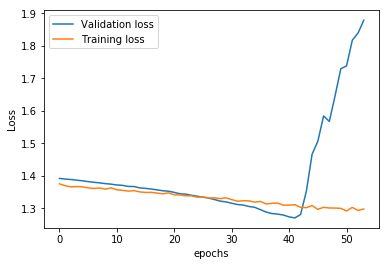

In [359]:
import re
plt.plot(range(len(loss_val)),loss_val, label='Validation loss')
plt.plot(range(len(loss_train)),loss_train, label='Training loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
loss_file="Loss_for_"
match_regex = "\.(.*)"
lr_str = re.findall(match_regex,str(lr))[0]
print(lr_str[5:])
name_file= str(N_ASSETS)+"assets_"+str(epochs)+" epochs_"+str(number)+"batch_"+str(rolling_window_step)+ "rollingwindow"+str(VALIDATION_SPLIT)[-1:]+"valsplit"
plt.savefig(loss_file+name_file)
plt.show()


In [360]:
y_pred = np.zeros((int(len(y_test)/batch_dim),batch_dim))
print(y_pred.shape)
for ii, (x_validation,y_validation) in enumerate(testloader):
    x_validation = x_validation.permute([1,0,2])           
    inputs = Variable(x_validation)
    if inputs.shape[1]!= batch_dim:
        print(ii*batch_dim-y_test.shape[0])
        break
    pred = lstm.predict(inputs).data.numpy()
    y_pred[ii,:] = np.argmax(pred, axis=1)
    print(pred)
y_pred.shape

(39, 3)
[[ 0.10316756  0.00359378 -0.3176367   0.28745794]
 [ 0.10400892  0.00351435 -0.31758273  0.28738305]
 [ 0.10444164  0.00372016 -0.31797293  0.28826368]]
[[ 0.24275428 -0.05095769 -0.6570765   0.5506539 ]
 [ 0.24290514 -0.05102442 -0.65685177  0.55010206]
 [ 0.24266762 -0.05116571 -0.6567339   0.54982126]]
[[ 0.37467903 -0.10627401 -0.979999    0.79584414]
 [ 0.37342075 -0.10577184 -0.97679794  0.7935585 ]
 [ 0.37357357 -0.10602841 -0.9781079   0.7946801 ]]
[[ 0.5048573  -0.1637142  -1.3068365   1.0416771 ]
 [ 0.50387985 -0.16319592 -1.3034202   1.0387967 ]
 [ 0.5036872  -0.163325   -1.3035793   1.0388998 ]]
[[ 0.6452424  -0.22728702 -1.6644915   1.3080539 ]
 [ 0.64379436 -0.22679064 -1.6616884   1.3063589 ]
 [ 0.64301467 -0.22649428 -1.6594522   1.3042878 ]]
[[ 0.79749835 -0.29814053 -2.0608375   1.6019552 ]
 [ 0.7945732  -0.29755875 -2.0561717   1.5990499 ]
 [ 0.79475355 -0.29712266 -2.0545325   1.5975673 ]]
[[ 0.9528741  -0.37269142 -2.4776468   1.9112858 ]
 [ 0.95051426 -0.

(39, 3)

(120, 5)

 (e) Cumulative performance of 1$ invested in December 1987:


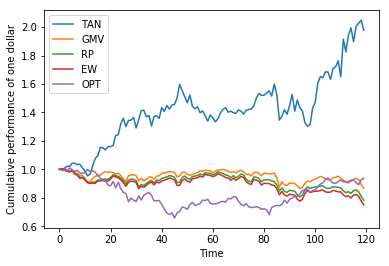

In [361]:
y_bar = np.reshape(y_pred,y_pred.shape[0]*y_pred.shape[1])

p_perf_test = p_perf[start_test_index:]
dif = p_perf_test.shape[0] - y_bar.shape[0]

y_bar_approxi = np.append(y_bar,np.zeros(dif))

opt_portfolio = np.zeros(len(p_perf_test))
for i in range(len(p_perf_test)):
    opt_portfolio[i] = p_perf[i,int(y_bar_approxi[i])]

performance = np.c_[p_perf_test, opt_portfolio ]
strategies = ['TAN','GMV','RP','EW','OPT']

ones = np.ones((1,5))
cumperf = np.cumprod(np.concatenate((ones,1 + performance),axis=0),axis=0) #cumprod because when we win money we reinvest it directly
print(cumperf.shape)
#print(dates[start_test_index:cumperf.shape[0]+start_test_index])
df_cumperf = pd.DataFrame(data=cumperf,columns=strategies) #,index=dates_cumperf
#print(df_cumperf[1250:1500])
df_cumperf.plot()
plt.xlabel('Time')
plt.ylabel('Cumulative performance of one dollar')
plt.legend(strategies, loc=0)
#plt.ylim([-20,50])


print('\n (e) Cumulative performance of 1$ invested in December 1987:')
plt.savefig("Cumulative_perf_of_1$"+name_file)
plt.show()